In [163]:
import numpy as np 
import matplotlib.pyplot as plt 
import obspy
from obspy.core import read, UTCDateTime, Stream
from obspy.clients.fdsn.client import Client
from obspy.geodetics import gps2dist_azimuth
from matplotlib.transforms import blended_transform_factory


In [176]:
# set client
client = Client('IRIS')
t1 = UTCDateTime("2013-09-03T20:19:08.880")
t2 = UTCDateTime("2013-09-03T21:25:18.380")
t3 = UTCDateTime("2013-09-03T22:29:33.000")
t4 = UTCDateTime("2013-09-04T00:23:12.230")

tstart = UTCDateTime("2013-09-03T20:18:40.000")
tend = t1 + 4.6*60*60

t1_diff = np.abs(t1 - tstart)
t2_diff = np.abs(t2 - tstart)
t3_diff = np.abs(t3 - tstart)
t4_diff = np.abs(t4 - tstart)

eq_lat = 51.0078
eq_lon = -130.6787

In [177]:
network = '7D'
stations = ['J63C',
            'J69C',
            'J68C',
            'J55C',
            'J73C',
            'J61C',
            'J46C',
            'J44C',
            'M08C',
            'J30C',
            'M04C',
            'J36C',
            'J23C',
            'J25C']
channel = 'BHZ'

st = Stream()
for station in stations:
    st += client.get_waveforms(network, station, '*', channel, tstart, tend)

In [200]:
metadata = client.get_stations(network=network, station=stations[0], channel=channel, level='response')
for station in stations[1:]:
    metadata += client.get_stations(network=network, station=station, channel=channel, level='response')


In [201]:
latlon = []

for i in range(len(st)):
    latlon.append((metadata[i][0][0].latitude, metadata[i][0][0].longitude))

for tr, latlon in zip(st, latlon):
    tr.stats.distance = gps2dist_azimuth(eq_lat, eq_lon, latlon[0], latlon[1])[0]

Text(0.5, 1.05, '2013-09-03 20:19:08 7D (Cascadia Initiative) BHZ')

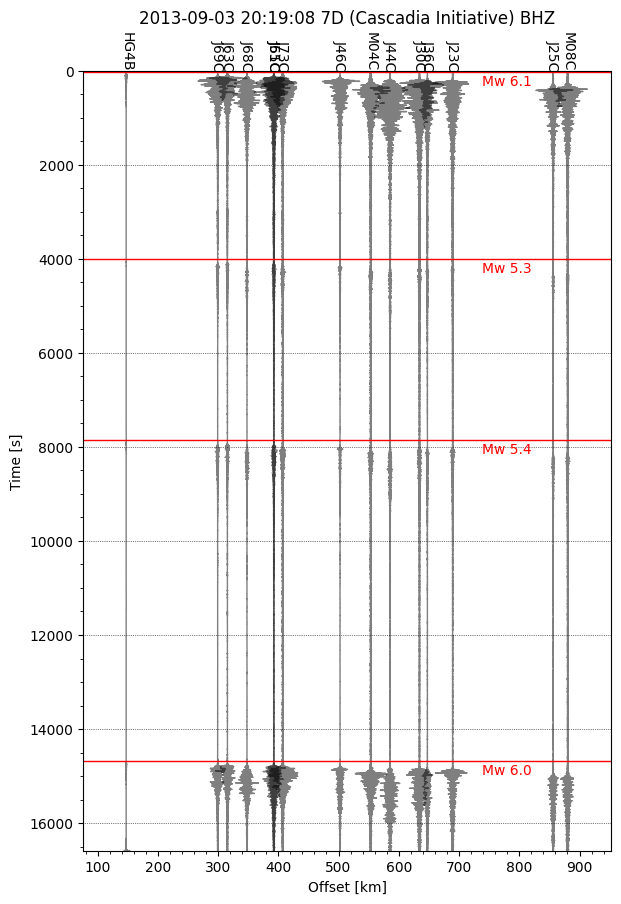

In [202]:
st.filter('bandpass', freqmin=0.1, freqmax=10)

fig = plt.figure(figsize=(6, 10))
st.plot(type='section', time_down=True, fig=fig, )

# Plot customization: Add station labels to offset axis
ax = fig.axes[0]
transform = blended_transform_factory(ax.transData, ax.transAxes)
for tr in st:
    ax.text(tr.stats.distance / 1e3, 1.0, tr.stats.station, rotation=270,
            va="bottom", ha="center", transform=transform, zorder=10)
    
ax.axhline(t1_diff, color='red', lw=1)
ax.axhline(t2_diff, color='red', lw=1)
ax.axhline(t3_diff, color='red', lw=1)
ax.axhline(t4_diff, color='red', lw=1)

ax.text(780, t1_diff+200, 'Mw 6.1', color='red', va='center', ha='center')
ax.text(780, t2_diff+200, 'Mw 5.3', color='red', va='center', ha='center')
ax.text(780, t3_diff+200, 'Mw 5.4', color='red', va='center', ha='center')
ax.text(780, t4_diff+200, 'Mw 6.0', color='red', va='center', ha='center')

ax.set_title(f'{t1.strftime("%Y-%m-%d %H:%M:%S")} 7D (Cascadia Initiative) BHZ', y=1.05)